In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Car Price Analysis

* Read in the dataset `car_prices.csv` using the code below.
* Run the info and describe DataFrame methods to get a quick understanding of the data.

In [3]:
cars = pd.read_csv("../Data/car_prices.csv", on_bad_lines='skip')

In [4]:
cars.head(5)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
cars['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [14]:
cars.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


# Numeric Variable Relationships

Use a pairplot to get a good sense for the relationships between the numeric variables in the dataset.

Turn off the upper corner of the pairplot matrix.

* Why do you think the relationship between `sellingprice` and `mmr` (the recommended selling price) is so strong?
* What is the relationship between `sellingprice` and `year` (the year the car was manufactured). Does this make sense?
* Once you've looked at the two relationships above, filter your dataframe down to the `body` styles ['SUV', 'Sedan', 'Convertible', and 'Coupe']. Color the scatterplot based on values in the `body` column. 

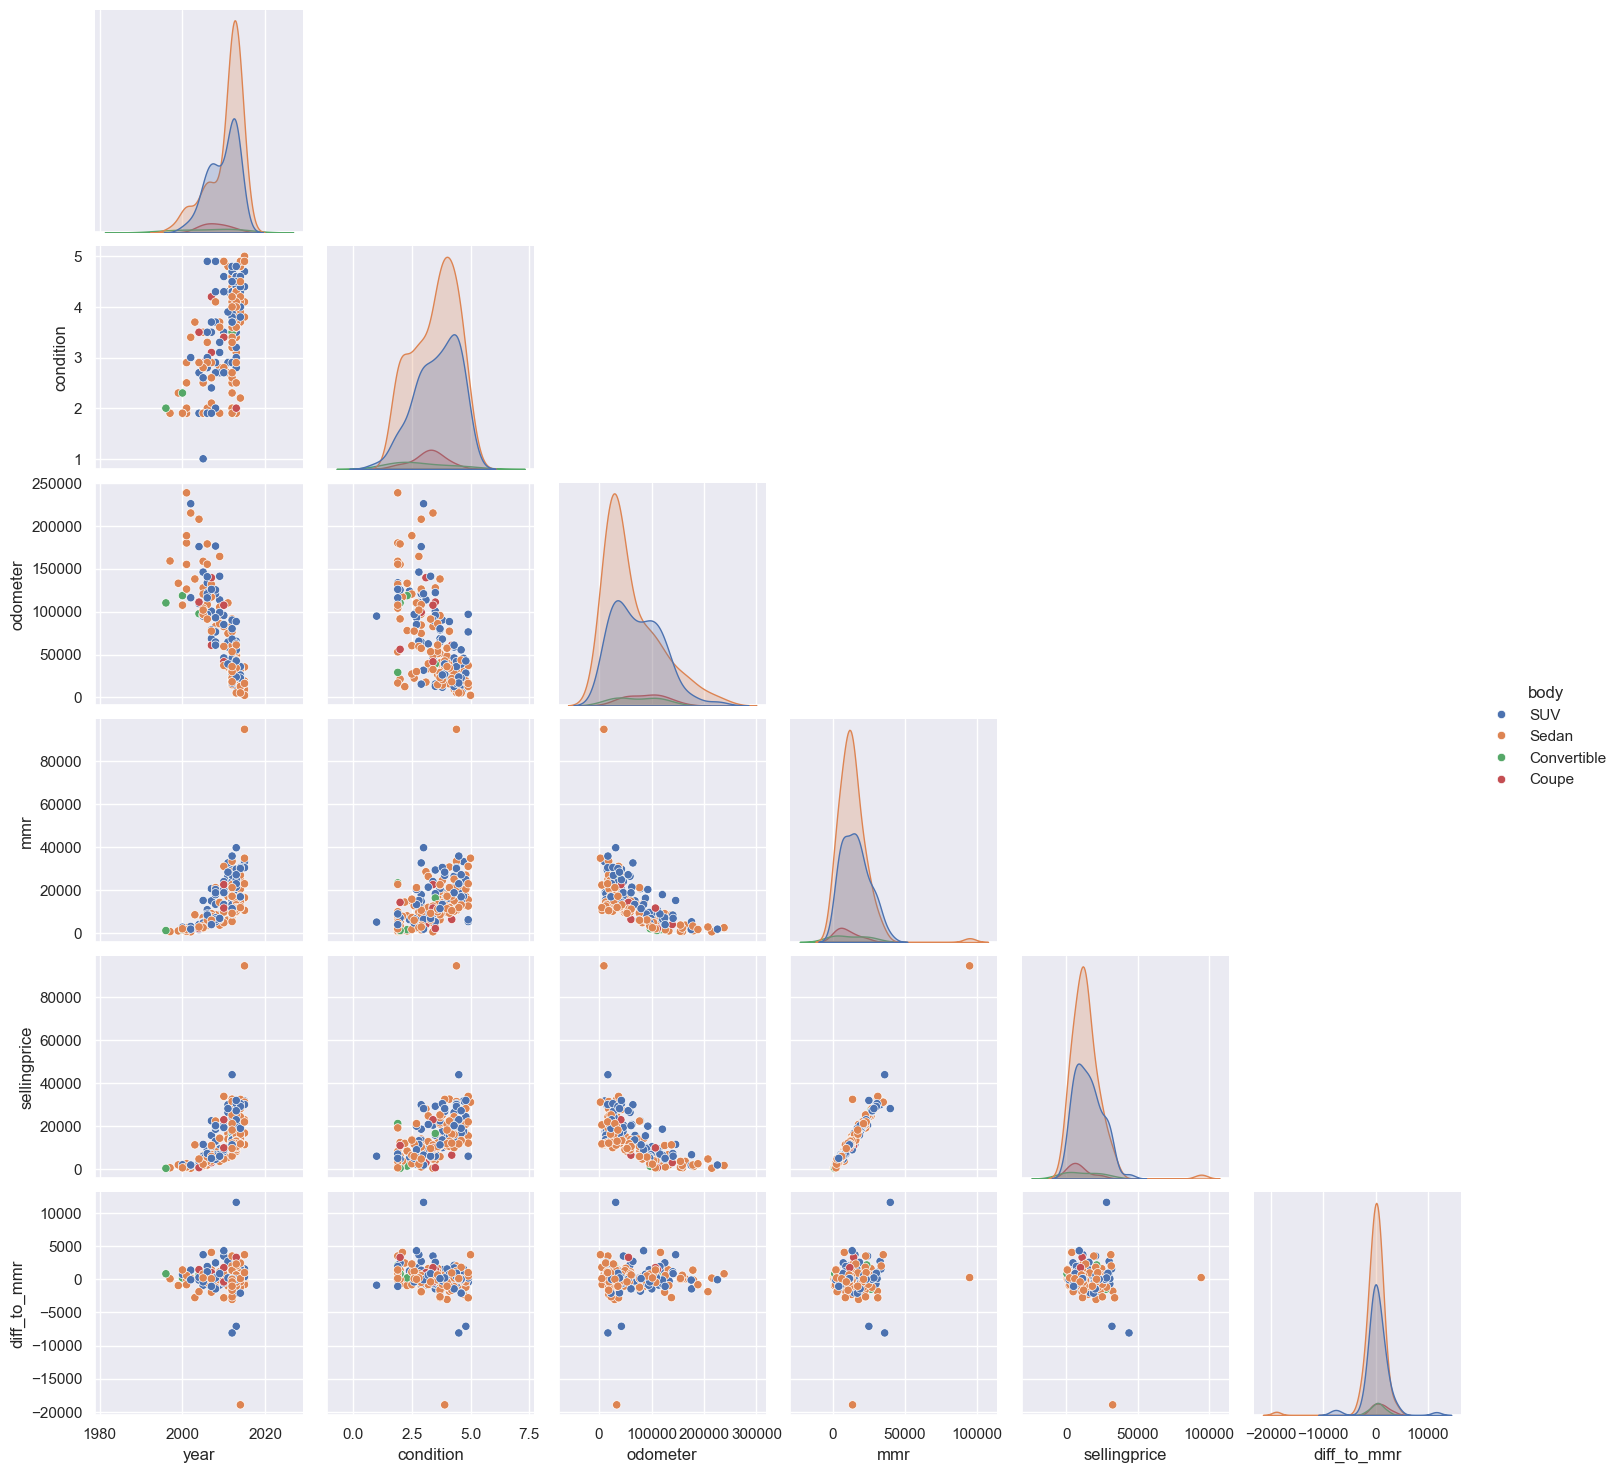

In [371]:
style_list = ["SUV", "Sedan", "Convertible", "Coupe"]

sns.pairplot(
    cars.query("body in @style_list").sample(200),
    corner=True,
    hue='body'
)
plt.xticks(rotation=95);
plt.savefig('pairplot.jpeg',dpi=700)

#### Correlation Heat Map

* Plot a heatmap of the correlation between the numeric variables. Does it make sense year and condition and odomoter are negatively correlated?


In [15]:
 cars.corr(numeric_only=True)

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.551282,-0.772720,0.596623,0.586488
condition,0.551282,1.000000,-0.538874,0.485050,0.538788
odometer,-0.772720,-0.538874,1.000000,-0.588107,-0.582405
mmr,0.596623,0.485050,-0.588107,1.000000,0.983634
sellingprice,0.586488,0.538788,-0.582405,0.983634,1.000000


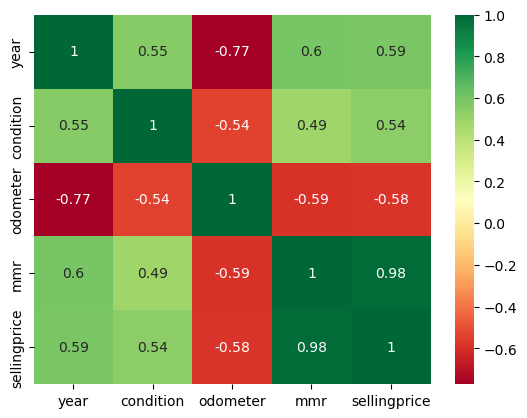

In [16]:
sns.heatmap(
    cars.corr(numeric_only=True),
    annot=True,
    cmap="RdYlGn",
);

#### Value Retention

* Filter your data down to the following values of `make` (brand): ['Ford', 'BMW', 'Toyota', 'Chevy'] 

* Build a linear relationship plot comparing `odometer` (distance car has travelled) vs. `sellingprice`, broken out by `make`.

* If you want to fit a regression with scipy.stats, use dropna() on the dataframe first.

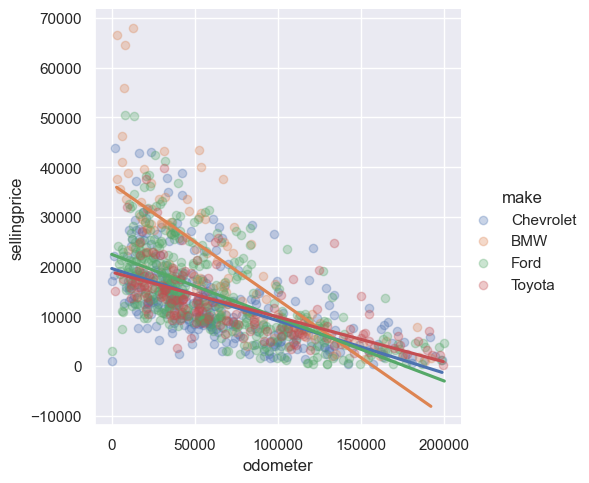

In [372]:
brand_list = ['Ford', 'BMW', 'Toyota', 'Chevrolet']

sns.lmplot(
    x="odometer",
    y="sellingprice",
    data=cars.query("make in @brand_list and sellingprice <150000 and odometer < 200000").sample(1000),
    hue="make",
   scatter_kws=({"alpha": .3}),
    ci=None,
)
plt.savefig('lmplot.jpeg',dpi=700)

In [11]:
import scipy.stats as stats

cars_regress = cars.dropna()

stats.linregress(x=cars_regress["odometer"], y=cars_regress["sellingprice"])

LinregressResult(slope=-0.1068630595484152, intercept=20818.284085956475, rvalue=-0.5773849819198611, pvalue=0.0, stderr=0.0002198765076131096, intercept_stderr=18.58796228286365)

In [12]:

for brand in cars_regress.query("make in @brand_list").loc[:,"make"].unique():
    df_filtered = cars_regress.loc[cars_regress["make"] == brand]
    print(f"{brand}: {stats.linregress(df_filtered['odometer'], df_filtered['sellingprice'])[0:2]}")

BMW: (-0.22250330429676335, 35567.979744684795)
Chevrolet: (-0.08841045962774954, 18705.58735748506)
Ford: (-0.09953734771818874, 20840.011075886512)
Toyota: (-0.07594777614361671, 17813.017107685304)


# Categorical Variable Relationships

* Bin the `condition` variable into increments of .5. For example, the first bin will be '1-1.5', the second '1.5-2', and so on up until the maximum condition value of 5. Use pd.cut() to create the bins.

* Build a barplot of the average price by condition bin.

In [327]:
#fig, ax = plt.subplots(figsize=(10, 10))

bins = np.linspace(1, 5, 9)
labels = ["1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4-4.5", "4.5-5"]
cars["condition_bins"] = pd.cut(
    cars["condition"], 
    bins=bins, 
    labels=labels
)


In [342]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   year            558811 non-null  int64   
 1   make            548510 non-null  object  
 2   model           548412 non-null  object  
 3   trim            548160 non-null  object  
 4   body            545616 non-null  object  
 5   transmission    493458 non-null  object  
 6   vin             558811 non-null  object  
 7   state           558811 non-null  object  
 8   condition       547017 non-null  float64 
 9   odometer        558717 non-null  float64 
 10  color           558062 non-null  object  
 11  interior        558062 non-null  object  
 12  seller          558811 non-null  object  
 13  mmr             558811 non-null  int64   
 14  sellingprice    558811 non-null  int64   
 15  saledate        558811 non-null  object  
 16  condition_bins  539653 non-null  categ

In [ ]:
#condition 4.5-5 to sell over 20,000 usa dollar 
# lowest condition sell over $4000 usa dollar 

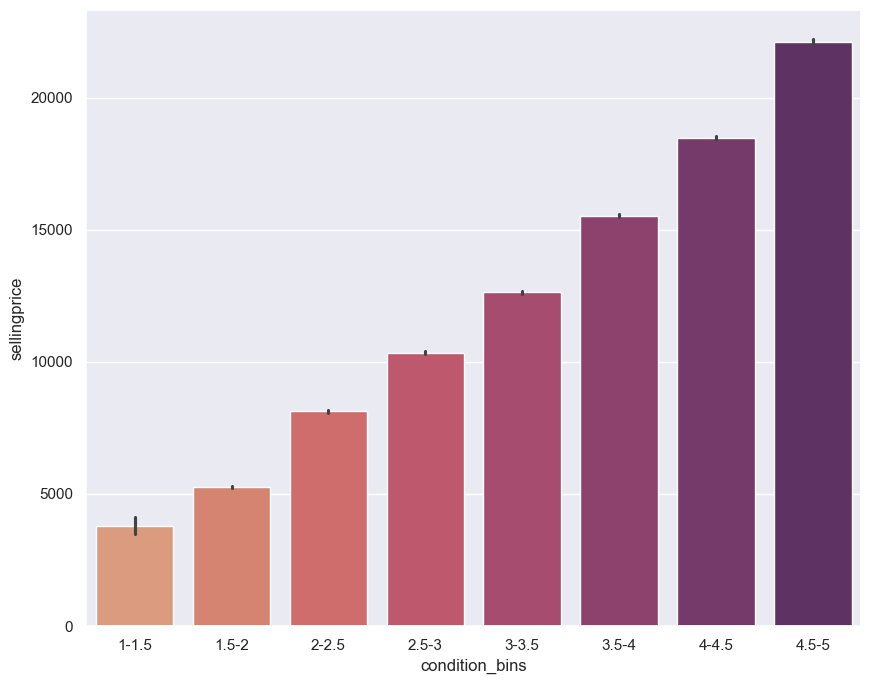

In [373]:
sns.barplot(x="condition_bins", y="sellingprice",hue='condition_bins',palette='flare',legend=False, data=cars)
plt.savefig('barplot.jpeg',dpi=700)

# Price by make and condition

* Create a pivot table with the top 10 most common car brands `make` column as rows, and condition bins as columns. The values in the table should be the average selling price for each make/condition combination. Consider using value_counts to get the top 10 most common brands.

* Once you've created the table, build a heatmap from the data. Which brands and quality levels have the highest selling prices? Does this match your expecations?

In [29]:
top_10_comman_brand = cars.loc[:,'make'].value_counts().iloc[:10]
top_10_comman_brand

make
Ford         93554
Chevrolet    60197
Nissan       53946
Toyota       39871
Dodge        30710
Honda        27206
Hyundai      21816
BMW          20719
Kia          18077
Chrysler     17276
Name: count, dtype: int64

In [34]:
top_10 = cars.query("make in @top_10_comman_brand.index").pivot_table(index='make',columns='condition_bins',values='sellingprice',aggfunc='mean',observed=False)
top_10

condition_bins,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,4.5-5
make,,,,,,,,
BMW,4326.923077,6848.680865,10478.320029,12795.277669,16397.610281,21911.286118,28791.890310,35902.992693
Chevrolet,3021.031746,5384.030601,7425.967945,10325.668781,11622.675195,14436.514288,16733.687841,21580.124553
Chrysler,2354.545455,4301.224656,5367.031437,9077.602013,9247.621069,14813.315207,15212.500990,18388.446281
Dodge,4094.907407,5299.306603,7127.988641,9840.543230,10517.710952,14051.693213,14893.500000,18400.000000
Ford,4175.866667,5282.734146,8550.886379,10954.656807,13394.647490,15374.553012,17820.920366,20810.886556
Honda,5418.181818,5013.392857,7924.010577,9179.641598,11618.430007,13724.741442,16415.864917,19317.726330
Hyundai,3089.285714,5124.115218,7283.134792,8600.312323,10312.067568,11704.661821,13483.934264,16502.773497
Kia,4710.000000,4208.728571,6639.857005,8147.949483,10236.522039,11998.424662,13986.038947,16246.605411
Nissan,4592.682927,5509.596553,8431.096744,10016.940794,11893.454024,13056.597333,14654.276116,16105.622175


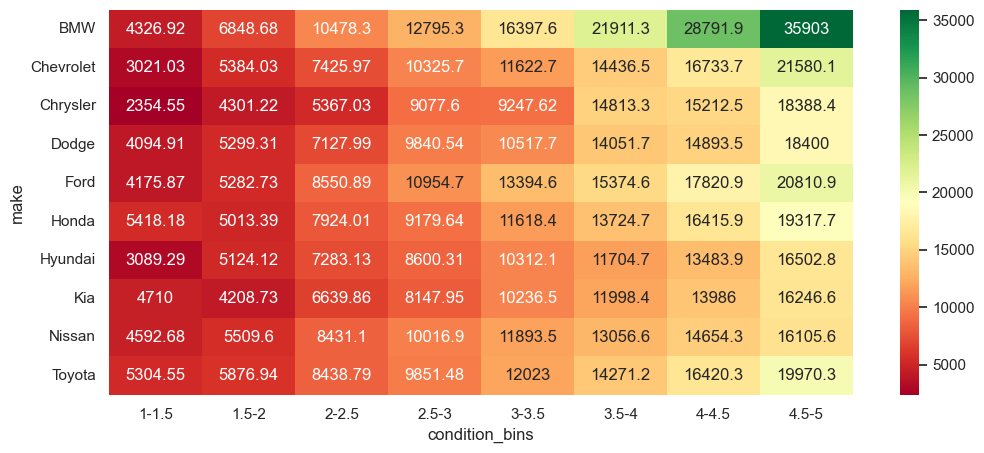

In [374]:
sns.set(rc={'figure.figsize':(12,5)})
sns.heatmap(top_10,annot=True,fmt='g',cmap='RdYlGn')
plt.savefig('heatmap.jpeg',dpi=700)

In [39]:
# Question : Which brands and quality levels have the highest selling prices?
#BWM

# Ford F-150 Deep Dive

Our client is mostly interested in purchasing work trucks - specifically the Ford F-150, the highest selling automobile for decades in the US. 

* Filter your data down to rows where `model` is "F-150".
* Then build a histogram of sellingprice with 10 bins. 

In [41]:
f150s = cars[cars["model"] == "F-150"]

f150s.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_bins
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,4.6,28687.0,gray,black,"ford motor credit company,llc pd",26700,30500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5-4
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),3-3.5
1074,2012,Ford,F-150,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,4.1,46444.0,red,black,"ford motor credit company,llc pd",26300,25600,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4-4.5


In [ ]:
# most truck sold on $15000 to $25000 dollars

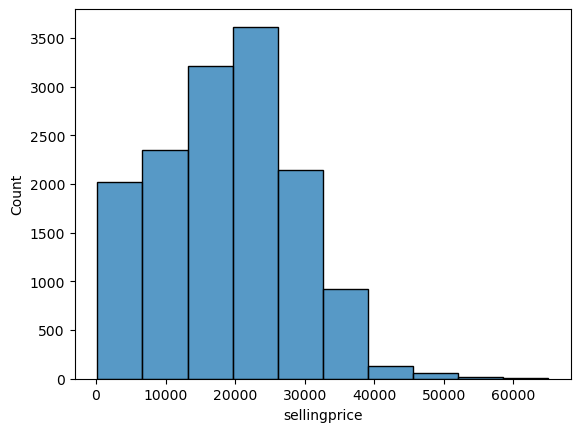

In [375]:
sns.set(rc={'figure.figsize':(8,5)})
plt.style.use('default')  
sns.histplot(x='sellingprice',bins=10,data=f150s)
plt.savefig('histogram.jpeg',dpi=700)

In [ ]:
#SVT Rapator have very high price

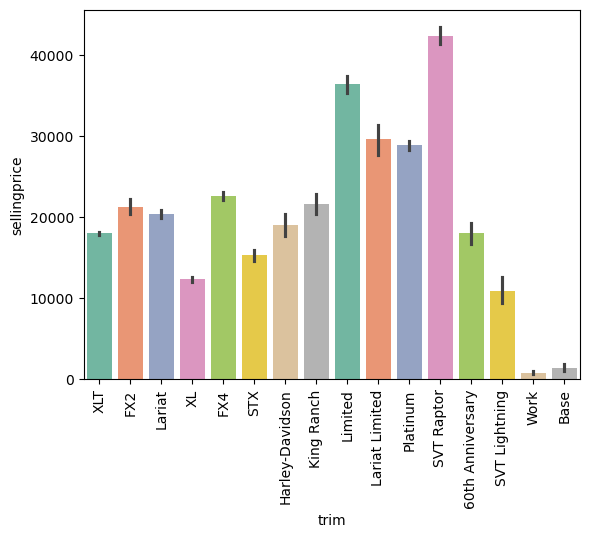

In [376]:
sns.barplot(x='trim',y='sellingprice',hue='trim',palette= 'Set2',data=f150s)
plt.xticks(rotation=90);
plt.savefig('barplot2.jpeg',dpi=700)

* Filter the dataset down to the trim levels ["XL", "XLT", "Platinum", "SVT Raptor"].

* Then, build a jointplot of `condition` (not binned) by `sellingprice`.

In [ ]:
# XL is tend to lowest price and SVT Raptor have highest price

In [64]:
trim_list = ['XL', 'XLT', 'Platinum', 'SVT Raptor']

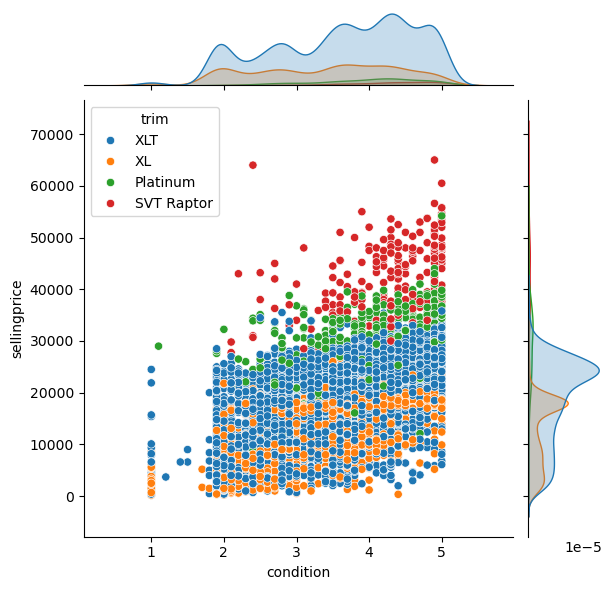

In [377]:
sns.jointplot(x='condition',y='sellingprice',hue='trim',palette='tab10',data=f150s.query("trim in @trim_list"))
plt.savefig('joinplot.jpeg',dpi=700)

In [117]:
f150s['color'].unique()

array(['gray', 'black', 'white', 'red', 'silver', 'blue', 'brown', 'gold',
       'burgundy', 'orange', 'green', 'beige', '—', 'purple', 'off-white',
       nan, 'yellow', 'charcoal', 'turquoise'], dtype=object)

In [ ]:
#  Purpose of diff_to_mmr
# Measures the difference between retail price (sellingprice) and wholesale value (mmr):

# Positive value: Car sold above MMR (profit for dealer).

# Negative value: Car sold below MMR (potential loss).

# Zero: Sold at exact wholesale value.

### Are there any "Deals"?

Ok, thanks to the charts above we're getting closer to honing in on the trucks to purchase.

* Create a column `diff_to_mmr` which is the difference between `sellingprice` and `mmr`.
* Then build a barplot looking at mean `diff_to_mmr` by `color`.
* Which color sells for more than the recommended price?

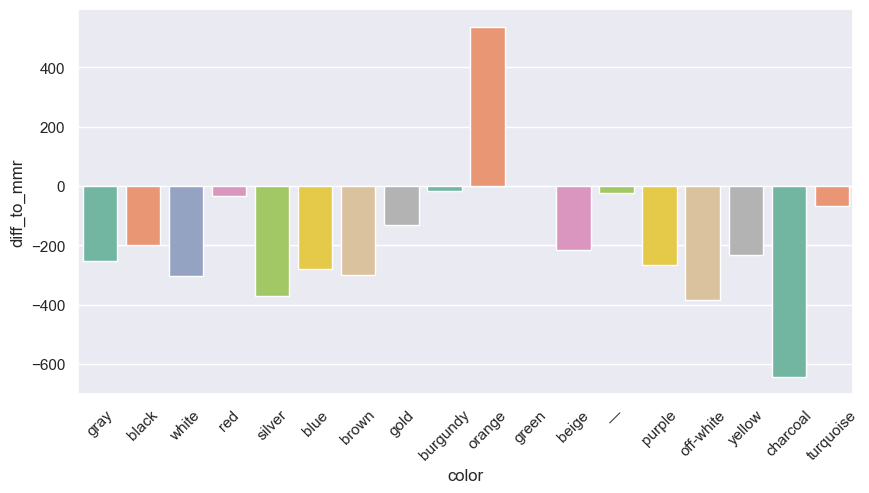

In [120]:
sns.set(rc={'figure.figsize':(10,5)})

sns.set_style("darkgrid")
f150s =f150s.assign(
   diff_to_mmr = f150s['sellingprice']-f150s['mmr']
)
sns.barplot(x=f150s['color'],y=f150s['diff_to_mmr'],hue='color',palette='Set2',legend=False,errorbar=None,estimator="mean",data=f150s)
plt.xticks(rotation=45);

In [201]:
f150s_data = f150s.loc[~f150s['color'].isin(['orange']) & (f150s['year'] >=2009) & (f150s['year'] <=2014),:]
f150s_data_pivot = f150s_data.pivot_table(index='trim',columns='condition_bins',values={"sellingprice": "mean"},observed=False )
f150s_data_pivot.tail(5)

sellingprice                                            \
condition_bins        1-1.5         1.5-2         2-2.5         2.5-3   
trim                                                                    
Platinum            29000.0  25570.000000  25294.117647  23875.555556   
STX                     NaN   9716.666667  14337.500000  16320.833333   
SVT Raptor              NaN           NaN  37583.333333  36392.857143   
XL                      NaN   8006.250000  12007.770270  12852.358974   
XLT                     NaN  15420.614035  16820.263158  18762.219828   

                                                                        
condition_bins         3-3.5         3.5-4         4-4.5         4.5-5  
trim                                                                    
Platinum        26917.796610  26883.152174  29517.808219  33677.631579  
STX             17265.789474  19109.027778  20409.523810  22691.237113  
SVT Raptor      36546.666667  40131.428571  42566.949153  45947.619048  
XL              15388.942308  16119.674556  17494.629156  18528.623188  
XLT             20110.634328  21281.357759  23204.475831  25061.060065

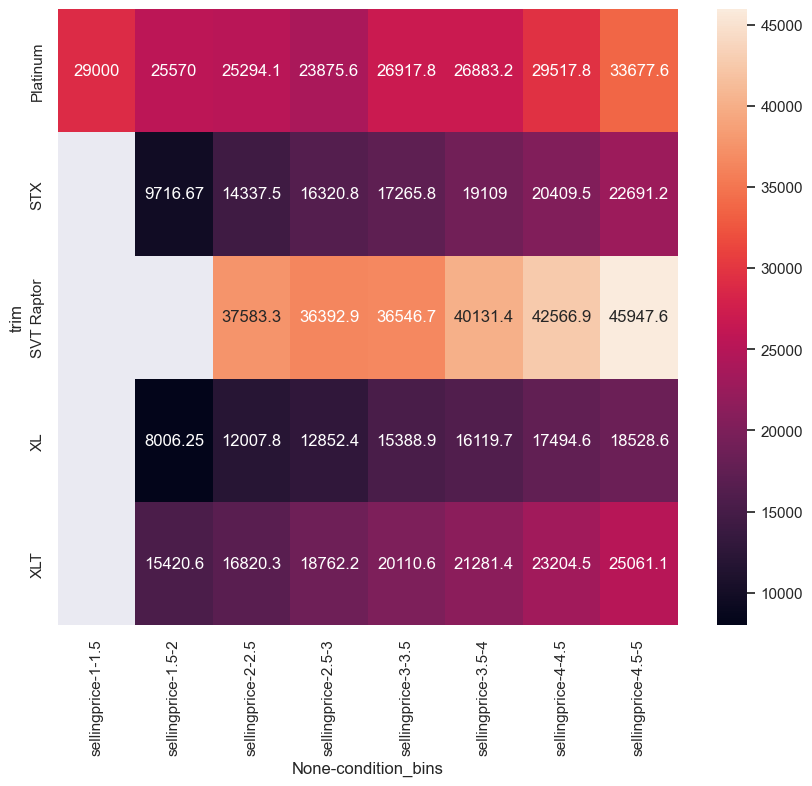

In [378]:
sns.set(rc={'figure.figsize':(10,8)})

sns.heatmap(
    f150s_data_pivot.tail(5),
    annot=True,
    fmt='g',
)
plt.grid(False)  # Remove grid lines
plt.savefig('heatmap2.jpeg',dpi=700)

* Further filter the data to the trims below. Exclude the color 'orange' and look only at trucks from years between 2009 and 2014. 

### Best state to buy trucks in?

* Ok, we've decided on the XLT model, it has more features than XL but is still quite affordable. Also filter out any trucks with a quality of less than 3.5. Your DataFrame should only have trucks with a quality of 3.5 or greater.
* Build a subplot with a bar chart of `state` by `diff_to_mmr` and `state` by `count` to find which states sell XLT models below mmr and have ample quantity.

In [313]:
f150s_XLT = (f150s
             .query("trim == 'XLT' and condition >= 3.5")
             .groupby(['state'], as_index=False)
             .agg(
                 mean_diff=("diff_to_mmr", 'mean'),
                 auto_count=("diff_to_mmr", "count")
             )
)
f150s_XLT.sort_values(by='auto_count',ascending=False).head(5)

,state,mean_diff,auto_count
13,mi,-435.954617,639
32,tx,79.633929,448
31,tn,18.554217,415
27,pa,392.223837,344
23,oh,166.416667,300


In [ ]:
# CA	+$1,024	XLTs sell $1k above MMR (profitable for sellers).
# AB	-$3,240	XLTs sell $3.2k below MMR (great for buyers).

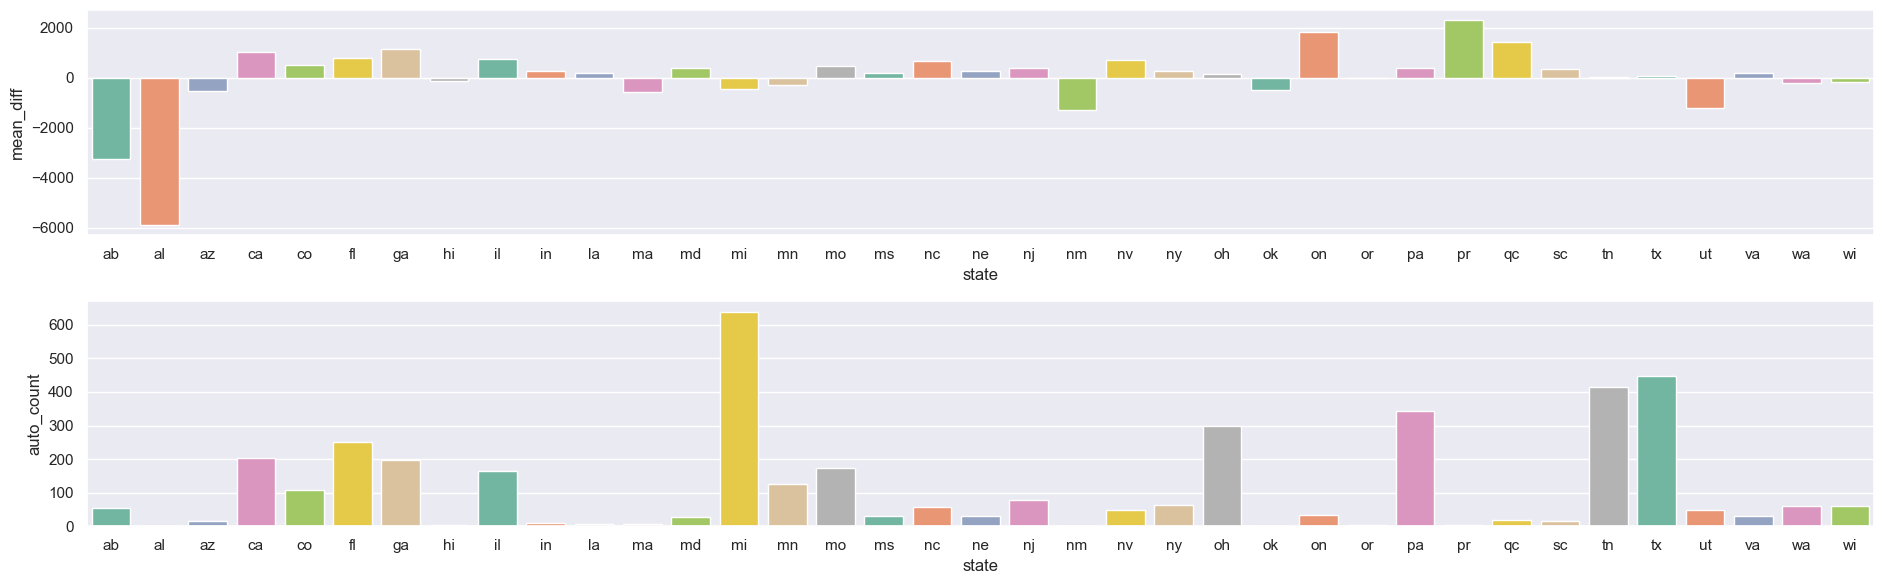

In [309]:
fig,ax = plt.subplots(2,1,figsize=(19,6))
sns.set_style('darkgrid')
sns.barplot(x='state',y='mean_diff',hue='state',palette='Set2',errorbar=None,data=f150s_XLT,ax=ax[0])
sns.barplot(x='state',y='auto_count',hue='state',palette='Set2',errorbar=None,data=f150s_XLT,ax=ax[1])
fig.tight_layout()

* Ok, looks like Utah (our client has an office nearby) has a good amount of quantity and a low average price. Take a look at the average diff_to_mmr and count of cars by saledate - feel free to return just a table. 

In [369]:
f150s.query("trim=='XLT' and state == 'ut' and condition > 3.5").groupby("saledate").agg({"diff_to_mmr":["mean", "count"]})

diff_to_mmr      
                                                mean count
saledate                                                  
Wed Feb 04 2015 03:30:00 GMT-0800 (PST) -1400.000000     2
Wed Feb 11 2015 03:30:00 GMT-0800 (PST) -1605.000000    10
Wed Feb 18 2015 03:30:00 GMT-0800 (PST)  -542.857143     7
Wed Feb 25 2015 03:30:00 GMT-0800 (PST)  -950.000000     4
Wed Jan 07 2015 11:30:00 GMT-0800 (PST) -2325.000000     2
Wed Jan 21 2015 03:30:00 GMT-0800 (PST)  -900.000000     2
Wed Jun 17 2015 04:30:00 GMT-0700 (PDT) -2120.000000     5
Wed Mar 04 2015 03:30:00 GMT-0800 (PST)  -600.000000     5